Part 1:

We can write this as an integral.

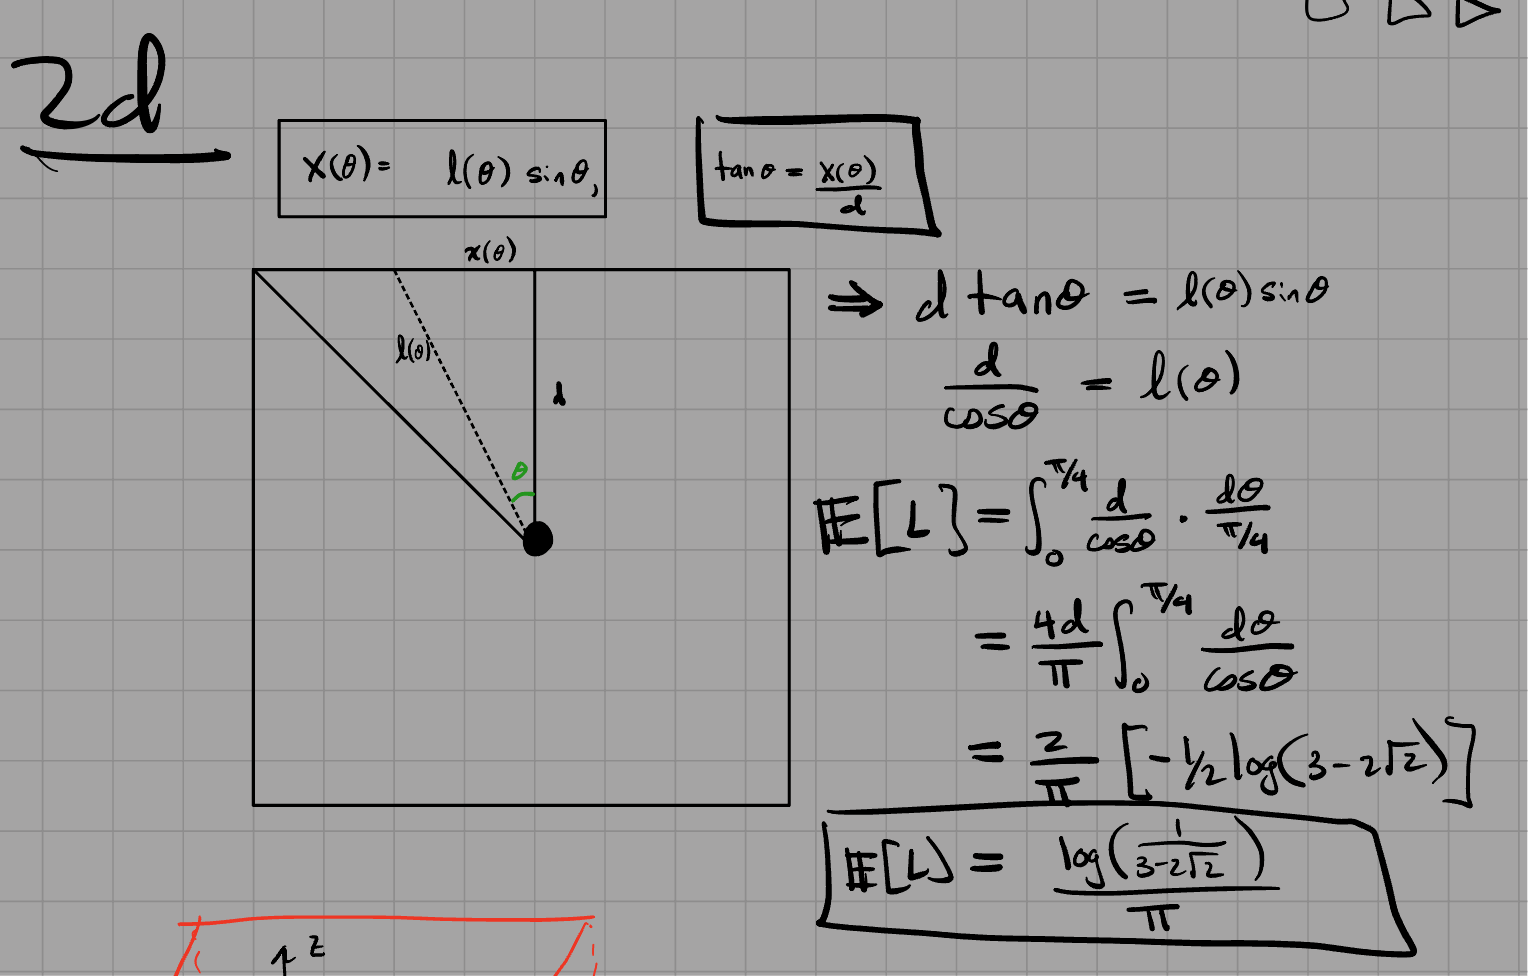


Precisely, we can just look at the top left triangle of the square. Let $L$ be the random variable that represents the distance to the perimeter. Let $d$ be the distance from the center of the square to the nearest edge.

For a given $\theta \in [0, \pi/4]$ we can compute the distance to the edge $\ell(\theta)$ using some simple trigonometry $$\ell(\theta) = \frac{d}{\cos\theta}.$$

We then take the expected value of $\ell(\theta)$ remembering to use the conditional distribution for $\theta$. We find

$$
\begin{equation}
\begin{aligned}
\mathbb{E}[L] & = \int_{0}^{\pi / 4} \ell(\theta) \frac{d \theta}{\pi/4} \\
& = \frac{4}{\pi} \int_{0}^{\pi / 4} \frac{d}{\cos\theta} d \theta \\
 & = \frac{4d}{\pi} \int_{0}^{\pi / 4} \frac{d \theta }{\cos\theta}\\
 & = -\frac{1}{\pi} \log \left(3-2 \sqrt{2}\right) \\
 & \boxed{\approx 0.5611}
\end{aligned}
\end{equation}
$$


## Part 2:

Now, we need to do the same thing but for the cube. This is a bit more difficult so we will need to refine our approach. Recall for spherical coordinates, we can express any $(x,y, z) \in \mathbb{R}^3$ in terms of spherical coordinates $(r, \phi, \theta)$ as

$$
\begin{align*}
z & = r\cos \phi \\
x & = r \sin \phi \cos \theta \\
y & = r \sin \phi \sin \theta
\end{align*}
$$

If we focus on only the top face of the cube, we can again use symmetry to simplify our analysis. Suppose our cube is centered at the origin in $\mathbb{R}^3$ We need to determine what conditions on $\theta$ and $\phi$ are needed so that the path taken leads out the top of the cube. First condition is that:

$$d = r \cos \phi$$

since we must exit out of the top of the cube. This implies that $\boxed{r = \frac{d}{\cos \phi}}$. Now we further invoke symmetry by focusing on the part of the top cube in which $\theta \in [0, \pi/4]$. This forms a right triangle on the top face what is $1/8$ of the area of the top face.

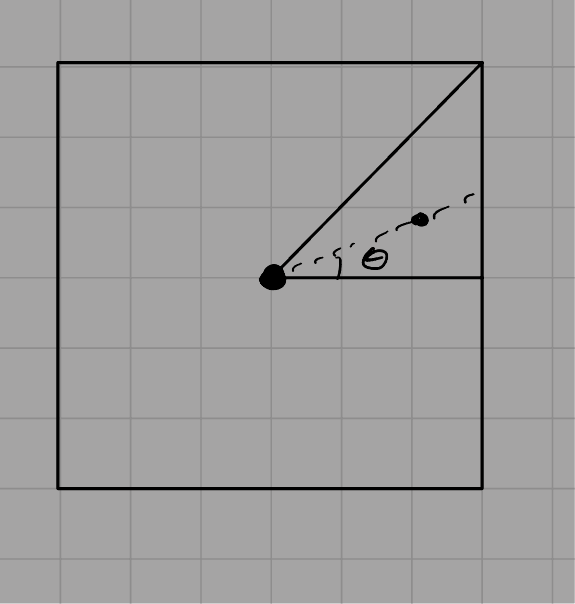

Now, for a fixed $\theta \in [0, \pi/4]$ what angle of $\phi$ will cause us to exit out the top? We require that

$$
\begin{align*}
0 \leq & x \leq d\\
0 \leq & y \leq d
\end{align*}
$$

which in spherical coordinates, and using our first condition, implies that

$$
\begin{align*}
0 \leq & d\tan \phi \cos \theta \leq d\\
0 \leq & d\tan \phi \sin \theta \leq \leq d
\end{align*}
$$

which simplifies to

$$
\begin{align*}
0 \leq & \phi \leq \arctan\frac{1}{\cos \theta}\\
0 \leq & \phi \leq \arctan\frac{1}{\sin \theta}
\end{align*}
$$

However for fixed $\theta \in [0, \pi/4]$ the first inequality is binding and thus our condition on $(\theta,\phi)$ such that we will exit out of this top triangle is:

$$
\begin{equation}
\boxed{
\begin{aligned}
0 \leq \theta &\leq \pi/4 \\
0 \leq \phi &\leq \arctan\frac{1}{\cos \theta}\\
\end{aligned}}
\end{equation}
$$

so we will need to integrate over that region of the sphere.

The next step is to find the length of the path taken to reach the edge of the cube.

Using our spherical expression for the cartesian coordinates, we find

$$
\begin{equation}
\begin{aligned}
\ell(\theta, \phi) & = \sqrt{z^2 + x^2 + y^2} \\
& = \sqrt{d^2  + d^2 \tan^2 \phi \cos^2 \theta + d^2 \tan^2 \phi \sin^2 \theta}\\
& = d \sqrt{1 + \tan^2 \phi}\\ 
& = d \sqrt{\sec^2 \phi}\\ 
& = \boxed{ d \sec \phi}
\end{aligned}
\end{equation}
$$

And now we are ready to get the expected value of the path over cube. By symmetry, there are 6 faces and our triangle was $1/8$ of one face so there are $48$ triangles just like ours, we can add up all of their contributions by scaling our single integral. Recall that the joint probability density for a set of angles $(\theta, \phi)$ on unit sphere is $f(\theta,\phi) = \frac{1}{4 \pi}\sin \phi d \theta d \phi$. We can now write the expected path lenghth as:

$$
\begin{equation}
\begin{aligned}
\mathbb{E}[L] &= 48\int_{0}^{\pi/4}\int_{0}^{\arctan\frac{1}{\cos \theta}} d \sec \phi \cdot \frac{1}{4 \pi}\sin \phi  \;d \phi \; d \theta \\ 
& = \frac{48 d}{4 \pi }\int_{0}^{\pi/4}\int_{0}^{\arctan\frac{1}{\cos \theta}}  \sec \phi \sin \phi \; d \phi \; d \theta \\
& = \frac{3}{ \pi }\int_{0}^{\pi/4}\int_{0}^{\arctan\frac{1}{\cos \theta}}  \sec \phi \sin \phi \; d \phi \; d \theta 
\end{aligned}
\end{equation}
$$

We can then evaluate this using our favorite computational tool Mathematica, to find 

$$\boxed{\mathbb{E}[L] \approx 0.610687}$$

Lastly, we always should check our answers (when we can) with a simulation.


In [5]:
# simulate
import numpy as np

l, u = -1 / 2, 1 / 2
eps = 1e-6
num_trials = 1_000_000
d = 1 / 2


def coords_3D(t, theta, phi):
    return (
        t * np.cos(theta) * np.sin(phi),
        t * np.sin(theta) * np.sin(phi),
        t * np.cos(phi),
    )


def dist(coords):
    return np.linalg.norm(coords)


def inb(coords):
    return all([l < x < u for x in coords])


def trial_3D():
    theta = np.random.uniform(0, 2 * np.pi)
    u2 = np.random.uniform(0, 1)
    phi = np.arccos(1 - 2 * u2)

    t_lo = 0
    t_hi = 5

    while (t_hi - t_lo) > eps:
        t = (t_lo + t_hi) / 2
        x, y, z = coords_3D(t, theta, phi)
        if inb([x, y, z]):
            t_lo = t
        else:
            t_hi = t

    return dist(coords_3D(t_lo, theta, phi))


def simulate_3D(n):
    return sum([trial_3D() for _ in range(n)]) / n

In [2]:
# Verify Idea with 2D


def coords_2D(t, theta):
    return t * np.cos(theta), t * np.sin(theta)


def trial_2D():
    theta = np.random.uniform(0, 2 * np.pi)

    t_lo = 0
    t_hi = 5

    while (t_hi - t_lo) > eps:
        t = (t_lo + t_hi) / 2
        x, y = coords_2D(t, theta)
        if inb([x, y]):
            t_lo = t
        else:
            t_hi = t

    return dist(coords_2D(t, theta))


def simulate_2D(n):
    return sum([trial_2D() for _ in range(n)]) / n

In [6]:
result_2d = simulate_2D(num_trials)
result_3d = simulate_3D(num_trials)
print(f"2D: {result_2d}, 3D: {result_3d}")

2D: 0.5610778500640392, 3D: 0.6106702719700337
